# Multiple Linear Regression From Scratch Using Normal Equation

Multiple Linear Regression

Multiple Linear Regression is a statistical technique that uses several explanatory variables (features) to predict the outcome of a response (target) variable i.e In MLR we predict the value of output for more than one input features. For example we can predict the price of house using it’s area, neighbourhood, number of bedrooms etc. It share the same idea as that of simple linear regression i.e. to find the best fitting line (hyperplane) given the input data. 

Hypothesis for Multiple Linear Regression is:-
y_pred = beta_0 + beta_1*x1 + beta_2*x2 + …..+ beta_n*xn
where y = predicted value
x, x2, ....xn = features
beta0, beta1, beta2,...betan = coefficients

We can convert this equation to matrix form, we get

y_pred = theta_transpose * feature_matrix 

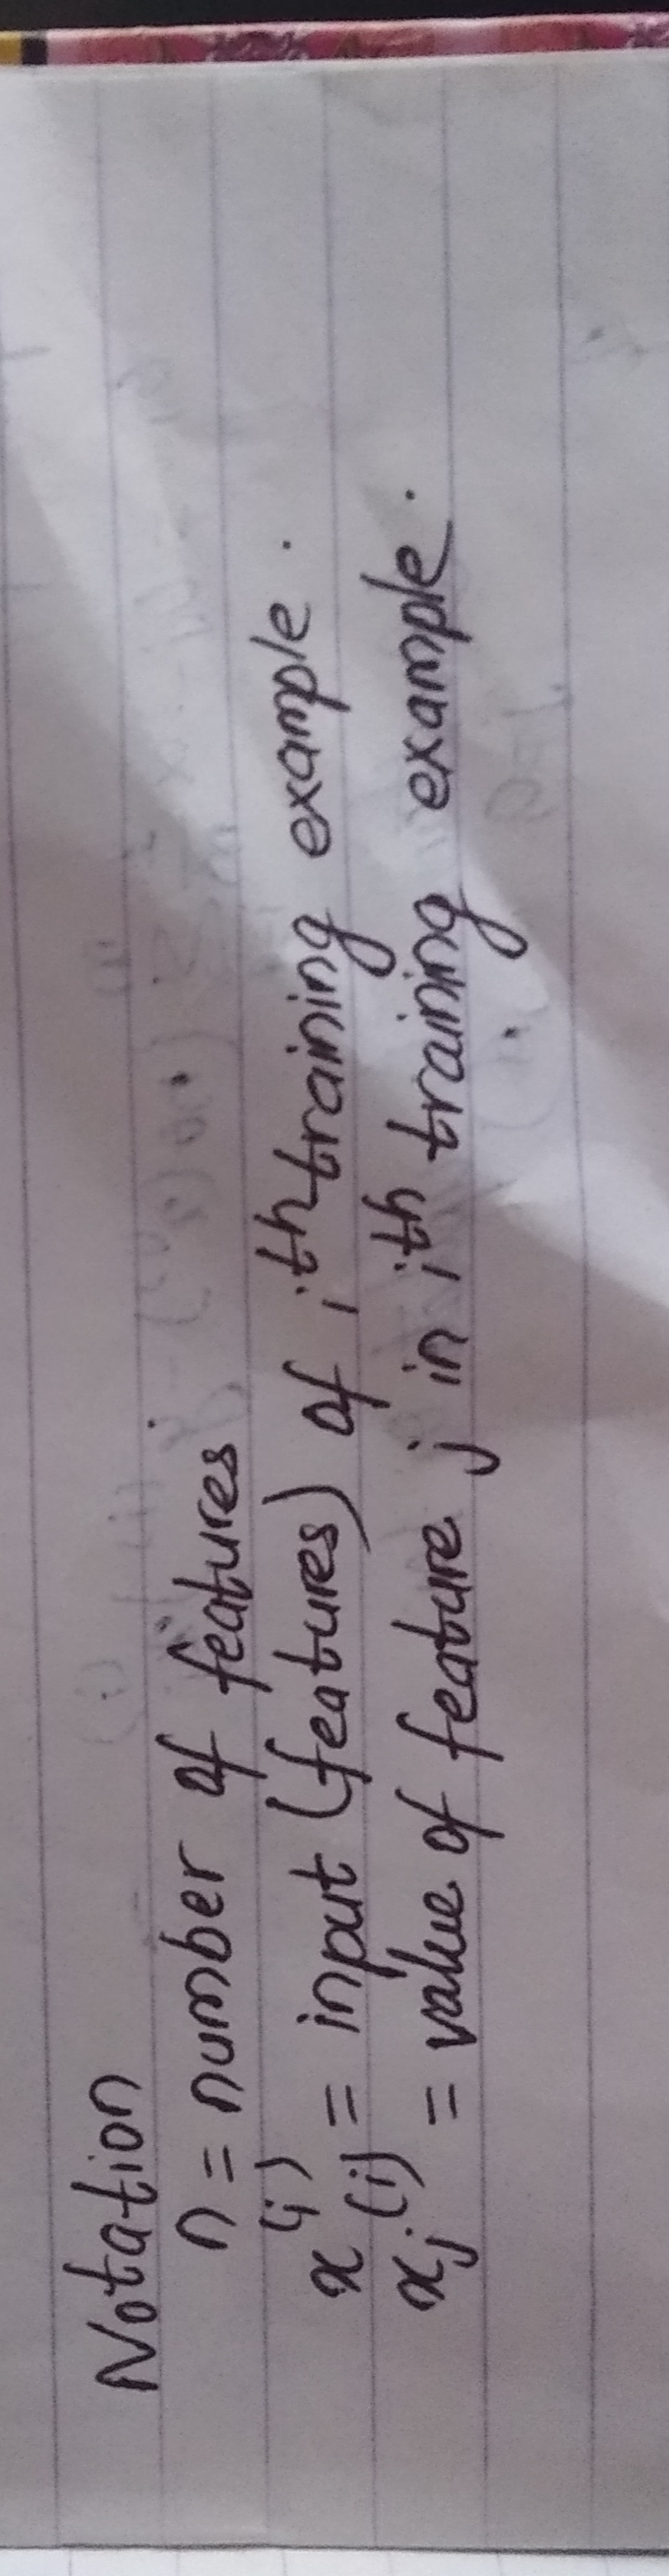

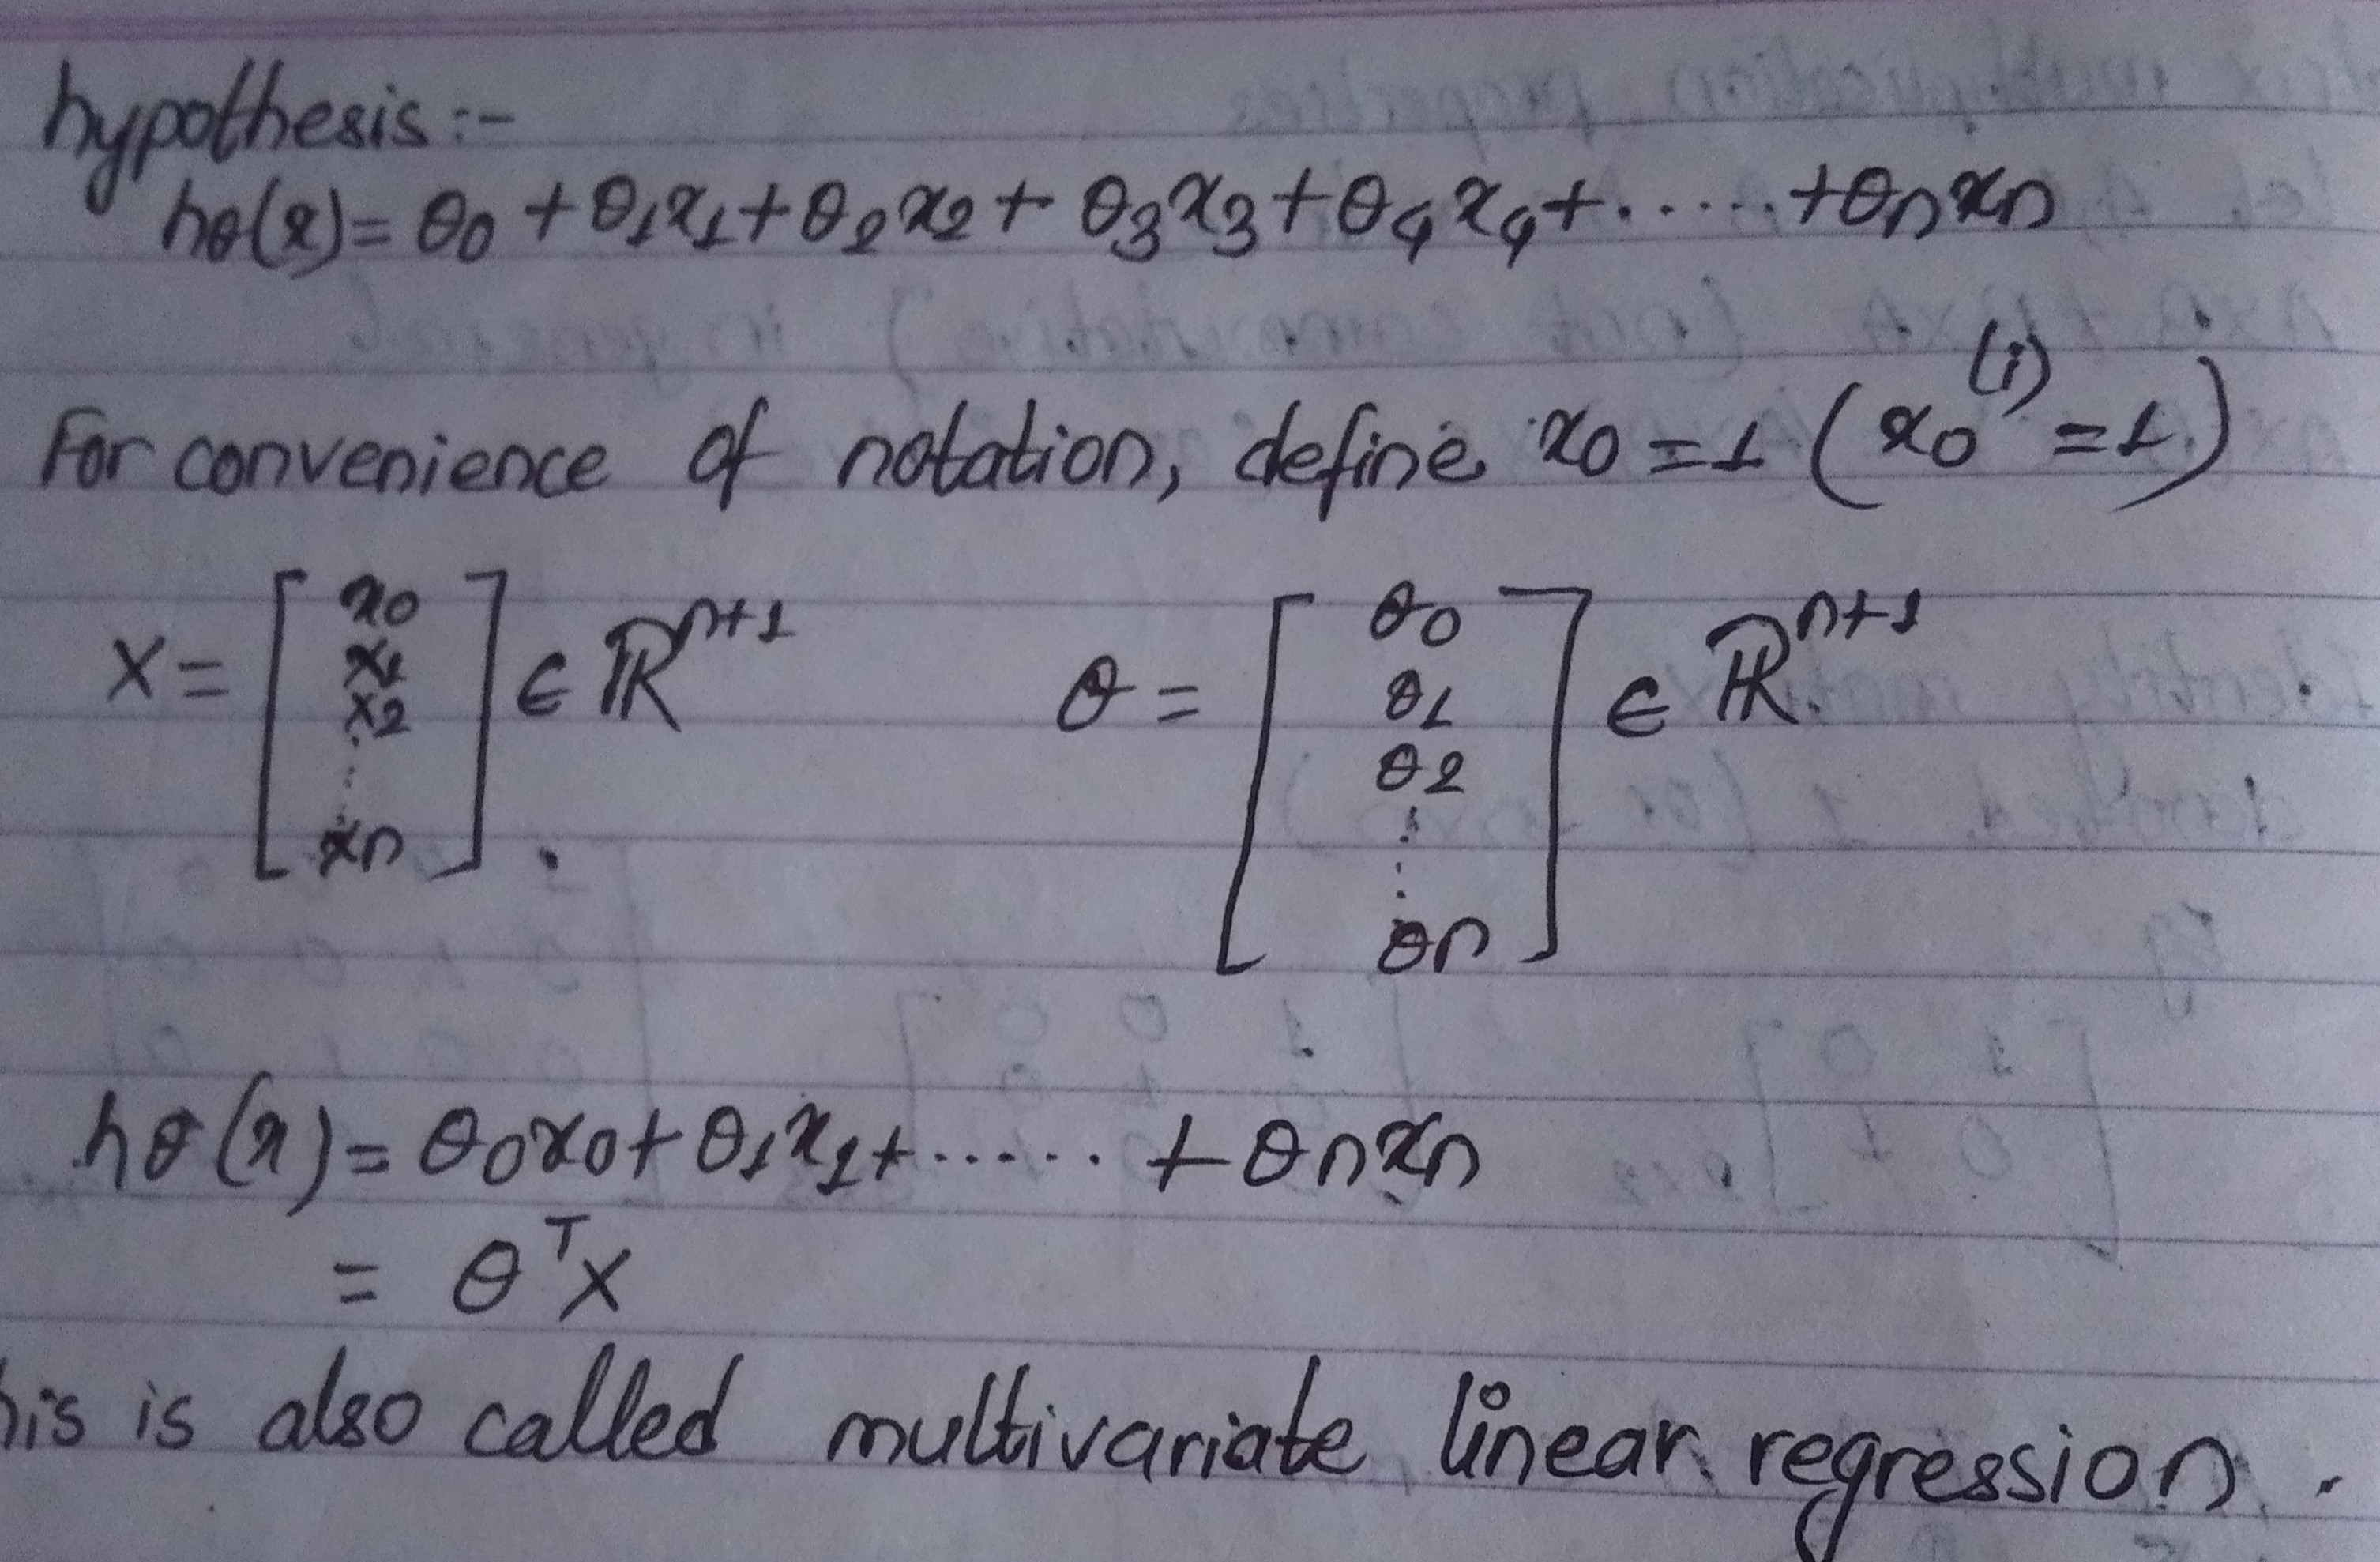

We can implement multiple linear regression by two methods.
1. Using gradient descent
2. Using Normal Equation

Here, we will implement multiple linear regression from scratch using normal equation.

Lets dive into the code.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
dataset = pd.read_csv("../dataset/energy.txt")
dataset.head()

,T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [3]:
dataset.isnull().sum() #checking null values

T     0
V     0
AP    0
RH    0
EP    0
dtype: int64

**Data Visualization**

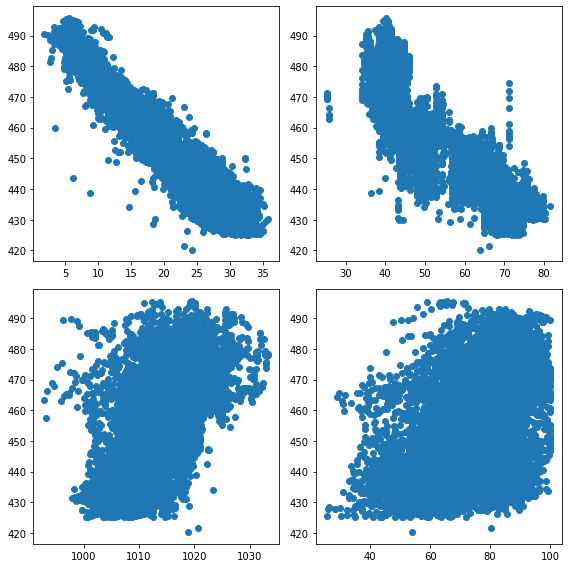

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.figsize = (10, 10)
ax[0, 0].scatter(dataset['T'], dataset['EP'])
ax[0, 1].scatter(dataset['V'], dataset['EP'])
ax[1, 0].scatter(dataset['AP'], dataset['EP'])
ax[1, 1].scatter(dataset['RH'], dataset['EP'])

plt.tight_layout()

In [5]:
#Spliting the dataset into x and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
print(X)
print(y)

[[   8.58   38.38 1021.03   84.37]
 [  21.79   58.2  1017.21   66.74]
 [  16.64   48.92 1011.55   78.76]
 ...
 [  29.8    69.34 1009.36   64.74]
 [  16.37   54.3  1017.94   63.63]
 [  30.11   62.04 1010.69   47.96]]
[482.26 446.94 452.56 ... 437.65 459.97 444.42]


## Splitting the dataset into training and test dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

In [8]:
print(X_train.shape[0])

5740


In [9]:
print(X_train)

[[  24.32   58.79 1016.8    65.61]
 [  20.42   62.96 1020.34   84.  ]
 [  11.21   44.03 1007.95   93.03]
 ...
 [  13.77   41.58 1020.63   72.94]
 [  22.72   69.13 1010.81   92.43]
 [   8.22   41.82 1032.77   71.63]]


In [10]:
print(X_test)

[[  24.06   69.94 1005.47   60.46]
 [  31.33   58.9  1003.77   52.34]
 [  25.9    59.54 1007.3    78.38]
 ...
 [  13.77   42.86 1012.86   88.83]
 [  25.48   58.95 1017.02   51.16]
 [  13.24   39.16 1016.52   86.66]]


In [11]:
print(y_train)

[442.78 452.08 471.79 ... 459.75 438.01 477.86]


In [12]:
print(y_test)

[436.88 439.54 439.36 ... 471.94 440.42 474.48]


In [13]:
X_train.shape

(5740, 4)

**Implementing Multiple Linear Regression From Scratch**

In [14]:
class OrdinaryLeastSquare(object):
  def __init__(self):
    self.coefficients = []

  def fit(self, X, y):
    if len(X.shape) == 1: X = self._reshape_x(X)

    X = self._concatenate_ones(X)
    self.coefficients = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
  
  
  def predict(self, entry):
    b0 = self.coefficients[0]
    other_betas = self.coefficients[1:]
    prediction = b0

    for xi, bi in zip(entry, other_betas):
      prediction += (bi * xi)

    return prediction
  
  
  def _reshape_x(self, X):
    return X.reshape(-1,1)

  
  def _concatenate_ones(self, X):
    ones = np.ones(shape= X.shape[0]).reshape(-1,1)
    return np.concatenate((ones,X), 1)

  

In [15]:
model = OrdinaryLeastSquare()
model.fit(X_train, y_train)

In [16]:
model.coefficients

array([ 4.61396707e+02, -1.98026264e+00, -2.33567762e-01,  5.55052016e-02,
       -1.59035685e-01])

In [17]:
y_pred = []

for row in X_test:
  y_pred.append(model.predict(row))

In [18]:
print(y_pred)

[443.6093764719244, 432.98846606993476, 439.6464529732707, 465.5540445698557, 460.4263854751644, 427.46489671565183, 474.532577424237, 488.2581504483929, 455.52099600196993, 476.8931728234976, 465.9893766873471, 472.77233371238793, 457.8057772336005, 436.79730906113184, 457.3690628512137, 446.063619873947, 441.31343288667864, 440.0362957259852, 465.0862144342629, 445.4566733347924, 442.4124021972884, 468.2795615974377, 471.45699921391355, 429.44551962131106, 446.7202801029291, 479.2670180561233, 479.33496316217514, 434.9468921497713, 450.4678605263056, 463.4805107328537, 460.584334419122, 441.6227710813509, 452.4805894455202, 464.90813642953844, 482.5434866278002, 461.9805710867664, 437.0745059050563, 452.2202284686542, 429.4979771056997, 482.0659568117138, 434.7798481072148, 432.9182293459573, 476.7808107403757, 468.2922867666004, 464.2531686369954, 465.86196766001484, 483.6661183136049, 466.61545132488834, 435.7149708911667, 480.4374942543314, 430.5061943639589, 448.0266735403437, 47

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))

21.08983879794091
0.930598327317931


Our model gives an r2_score of 0.93 which is pretty good.